# Cardivascular Disease Project

Cardiovascular Dieseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions (WHO). CVDs takes approximately 17,9 million lives annually around the globe, making it the leading cause of death globally. In singapore, nearly 1/3 of the deaths are due to heart disease or stroke alone.

This has prompted us to analyse this dataset using various data analysis, data science and machine learning techniques to gain insights regarding the rather prevalent issue. Our project aims to find out which variable is the most important in judging presence of CVDs in a person.

In [183]:
import numpy as np # scientific computing
import pandas as pd # high-performance data structures
import matplotlib.pyplot as plt # data visualization
import seaborn as sb # high-level data visualization
import os

from sklearn import preprocessing

In [184]:
# Import data
CardioData = pd.read_csv("cardio_train.csv", sep=';')

# First 5 row of dataset
CardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [185]:
# Basic information about the dataset
CardioData.info()
print("\nData Shape:",CardioData.shape)
print("Data type:",type(CardioData))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Data Shape: (70000, 13)
Data type: <class 'pandas.core.frame.DataFrame'>


# Data Cleaning

We begin cleaning data to ensure the dataset is optimal for analysis and eventually, machine learning.

In [186]:
# Create a copy of the dataset
CardioData_backup = CardioData.copy()

Base on the dataset, there are 5 numerical variables:
1. age
2. height
3. weight
4. ap_hi
5. ap_lo

and 6 categorical vairables:
1. gender (Male/Female)
2. cholesterol (Cholesterol Levels)
3. gluc (Glucose Levels)
4. smoke (Smoke/Doesn't smoke)
5. alco (Alcohol intake)
6. active (Physically/Physically Inactive)
          
As pandas.info() takes as attribute as numerical type, we have to convert the "categorical" type to "category" data types. 

In [187]:
# Remove id column
CardioData_backup = CardioData_backup.drop(columns='id')

# List for categorical variables
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# List for numerical variables
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Convert categorical variables into “category” data type
for cat_attrib in cat_attribs: 
    CardioData_backup[cat_attrib] = CardioData_backup[cat_attrib].astype('category') # convert data
CardioData_backup

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [188]:
# Summary of numerical attributes' statistics
CardioData_backup.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cardio,70000.0,0.499700,0.500003,0.0,0.0,0.0,1.0,1.0


As per the description of the numerical data, we identified that both min value for both ap_hi and ap-low, -150.0 and -70.0 respectively, are negative. This is unrealistic and indicate the presence of possible outliers.

The age is also represented in terms of number of days, we will be changing it to represent the number of years of age. This is more intuitive and easier to understand.


In [189]:
# Convert the age to number of years
CardioData_backup['age'] = CardioData_backup['age'] // 365.25

# Changing data type to string to allow for clearer catergorisation of gender as 'F' and 'M'
CardioData_backup['gender'] = CardioData_backup['gender'].astype('str')
CardioData_backup['gender'] = CardioData_backup['gender'].replace('1','F').replace('2','M')

# Changing data type to string to allow for clearer catergorisation of cholestrol levels as 'normal', 'above normal' and 'well above normal'
CardioData_backup['cholesterol'] = CardioData_backup['cholesterol'].astype('str')
CardioData_backup['cholesterol'] = CardioData_backup['cholesterol'].replace('1','normal').replace('2','above normal').replace('3','well above normal')

# Changing data type to string to allow for clearer catergorisation of smoker as 'No' and 'Yes'
CardioData_backup['smoke'] = CardioData_backup['smoke'].astype('str')
CardioData_backup['smoke'] = CardioData_backup['smoke'].replace('0','No').replace('1','Yes')

# Changing data type to string to allow for clearer catergorisation of alcohol consumption as 'No' and 'Yes'
CardioData_backup['alco'] = CardioData_backup['alco'].astype('str')
CardioData_backup['alco'] = CardioData_backup['alco'].replace('0','No').replace('1','Yes')

# Changing data type to string to allow for clearer catergorisation of clucose level as 'normal', 'above normal' and 'well above normal'
CardioData_backup['gluc'] = CardioData_backup['gluc'].astype('str')
CardioData_backup['gluc'] = CardioData_backup['gluc'].replace('1','normal').replace('2','above normal').replace('3','well above normal')

# Changing data type to string to allow for clearer catergorisation of presence of cardiovascular disease as 'No' and 'Yes'
CardioData_backup['cardio'] = CardioData_backup['cardio'].astype('str')
CardioData_backup['cardio'] = CardioData_backup['cardio'].replace('0','No').replace('1','Yes')


# Numerical Data Analysis

Now we will visualise the data to make better sense of how our data is looking like. We
will use box plots for prelimary data representation.

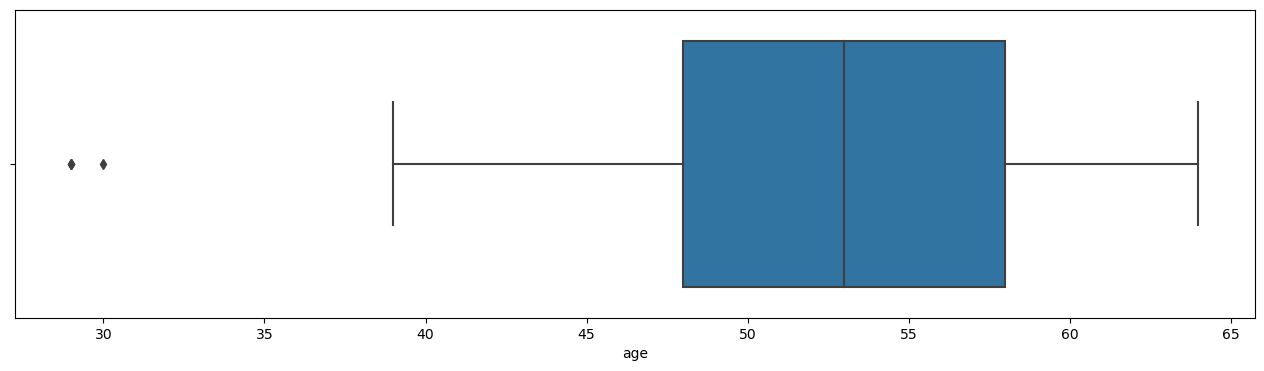

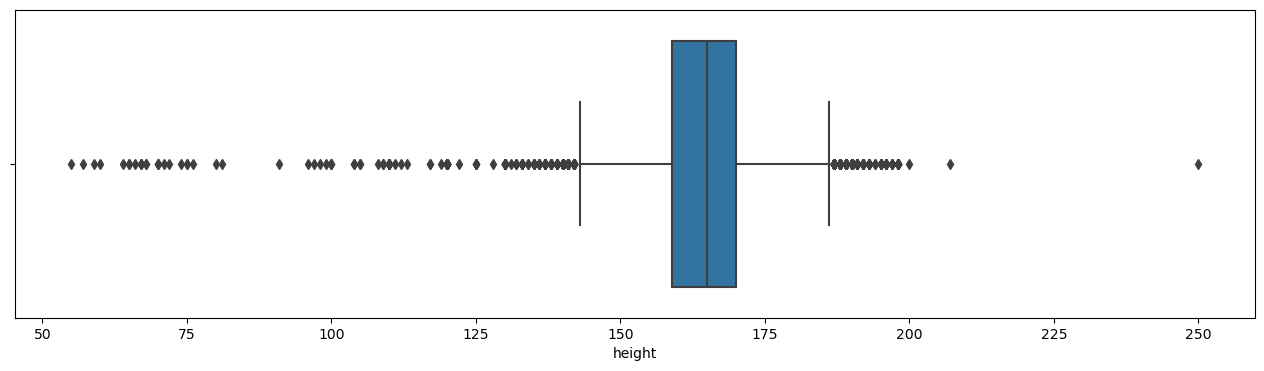

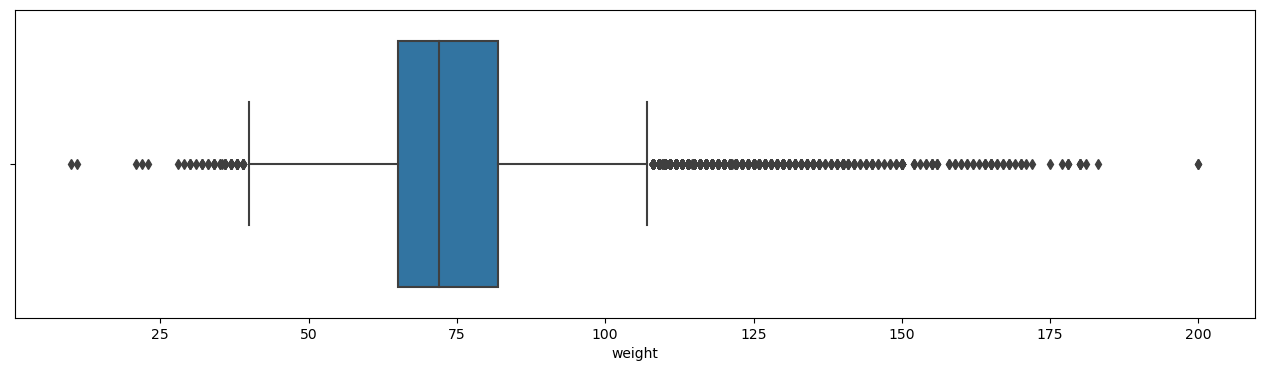

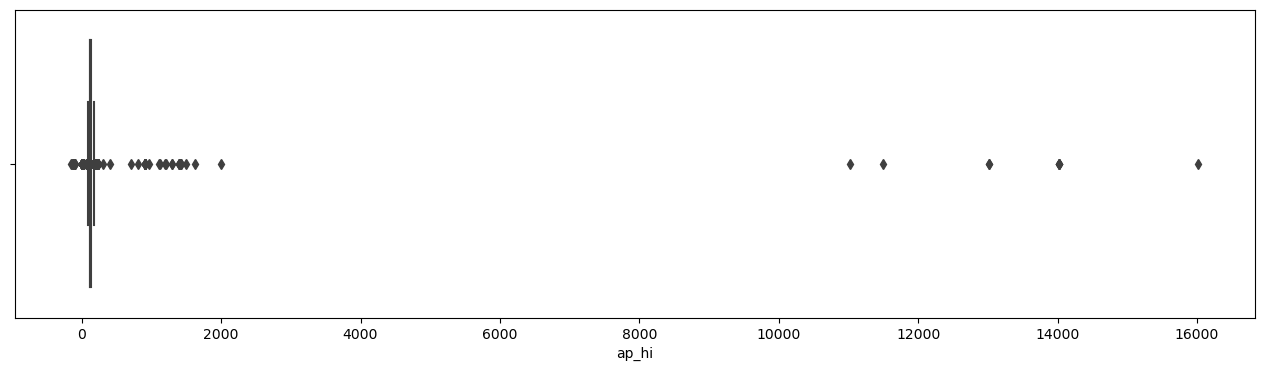

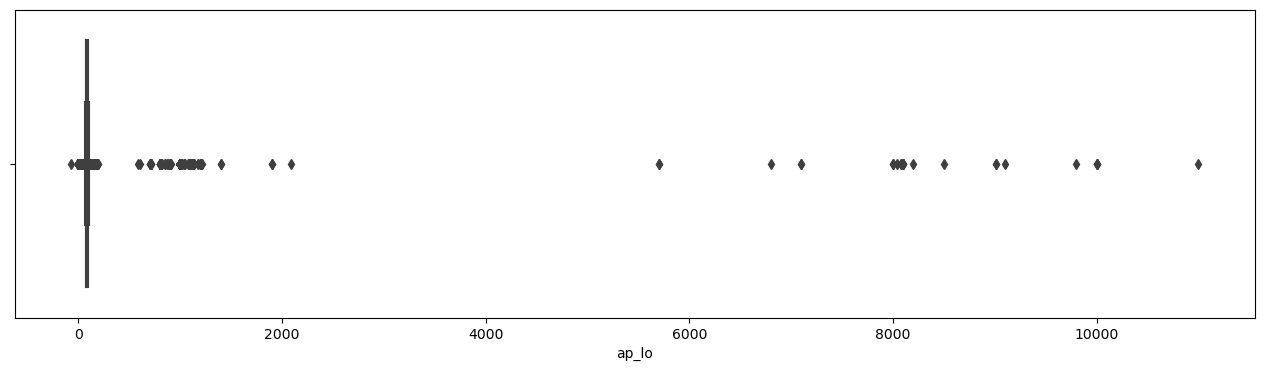

In [190]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(CardioData_backup[num_attribs])

# Boxplot of the numeric data
for var in numeric_data: # iterate over
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4)) # setup the fr
    sb.boxplot(data=CardioData_backup, x=var, orient='h') # box plot

**Blood Pressure**

Based on the boxplot for ap_hi and ap_lo, there are a lot of outliers that can be filtered out. Systolic(bp after heart contracts) and diastolic(bp before heart contracts) blood pressure should be within 33 - 180 mmHg in non-emergency cases as seen in the table below(excluding "dangerously low" and "hypertensive crisis").

In this prelimary data preparation, we want to find out how many outliers do we have amongst our current dataset which we will filter out by limiting the systolic blood pressure (50<ap_hi<180) and diastolic blood pressure (34<ap_lo<120).

![BloodPressureTable.jpeg](attachment:BloodPressureTable.jpeg)

In [191]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = CardioData_backup['ap_hi']
ap_lo = CardioData_backup['ap_lo']
# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 34 - 179 mmHg")
CardioData_backup['cardio'].loc[(ap_hi < 50) | (ap_hi > 180) | (ap_lo < 34) | (ap_lo > 120)].count()

The number of training examples have ap_hi and ap_lo outside the range of 34 - 179 mmHg


1577

A total of 1577 data points have ap_hi and ap_lo outside the range of 34 - 99 mmHg for ap_lo and 51 - 179 for ap_hi which is around 1.86% of the dataset from our preliminary data preparation.

<AxesSubplot:xlabel='ap_lo'>

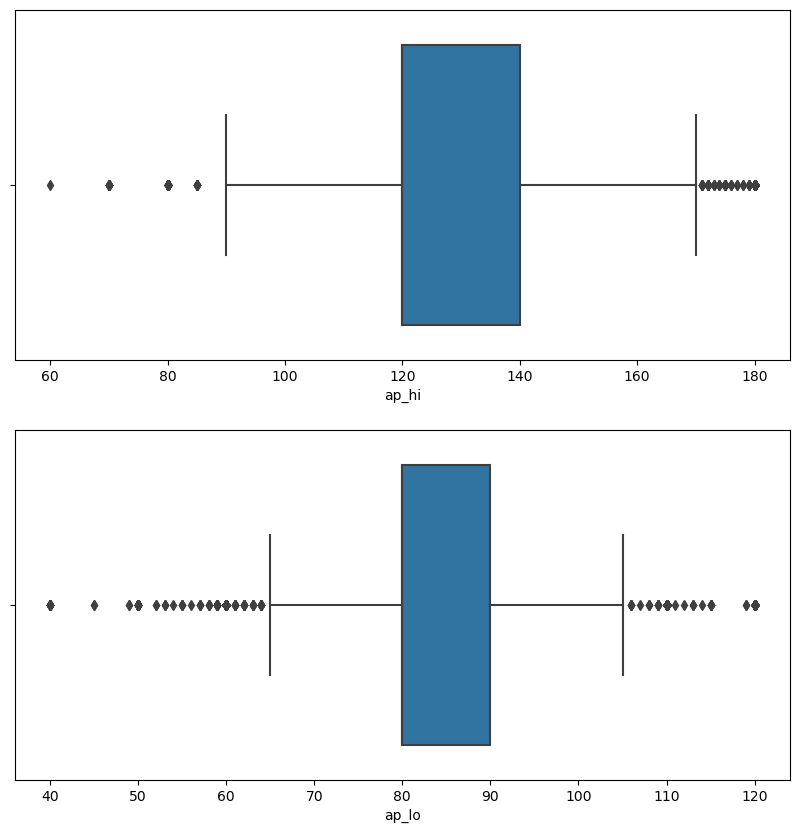

In [192]:
CardioData_backup1 = CardioData_backup.copy()

CardioData_backup1 = CardioData_backup1.drop(CardioData_backup.loc[(ap_hi < 50) | (ap_hi > 180) | (ap_lo < 34) | (ap_lo > 120)].index)
fig, axes = plt.subplots(nrows=2, figsize=(10,10))
sb.boxplot(data=CardioData_backup1, x='ap_hi', ax=axes[0], orient='h')
sb.boxplot(data=CardioData_backup1, x='ap_lo', ax=axes[1], orient='h')

We will be converting the blood pressure readings into "Category" type to make better use of the data that we have for now.

We will be splitting the data into the 6 level(exclulding "dangerously low" and "hypertensive crisis") based on the categories on the figure from a medically authored and reviewed MedicineNet article "Blood Pressure Readings: Chart, Normal, High, Low". 

We shall assign the 5 different stages of blood pressure from 1 to 5

1. Very low
2. low
3. Normal
4. Elevated
5. High blood pressure (Hypertension) Stage 1
6. High blood pressure (Hypertension) Stage 2

Diastolic blood pressure will not have stage 4: Elevated as both stage 5 and 6 falls under the category of 4 according to the table. Due to the overlap, we have opted to use both stage 5 and stage 6 categories instead of stage 4 solely in order to better define the dataset.


In [193]:
# Rank Systolic blood pressure
CardioData_backup.loc[ap_hi <= 60, 'ap_hi'] = 1
CardioData_backup.loc[(ap_hi > 60) & (ap_hi < 90), 'ap_hi'] = 2
CardioData_backup.loc[(ap_hi >= 90) & (ap_hi < 120), 'ap_hi'] = 3
CardioData_backup.loc[(ap_hi >= 120) & (ap_hi <= 129), 'ap_hi'] = 4
CardioData_backup.loc[(ap_hi >= 130) & (ap_hi <= 139), 'ap_hi'] = 5
CardioData_backup.loc[ap_hi >= 140, 'ap_hi'] = 6

# Rank Diastolic blood pressure
CardioData_backup.loc[ap_lo <= 40, 'ap_lo'] = 1
CardioData_backup.loc[(ap_lo > 40) & (ap_lo < 60), 'ap_lo'] = 2
CardioData_backup.loc[(ap_lo >= 60) & (ap_lo < 80), 'ap_lo'] = 3
CardioData_backup.loc[(ap_lo >= 80) & (ap_lo <= 89), 'ap_lo'] = 5
CardioData_backup.loc[ap_lo >= 90, 'ap_lo'] = 6

We shall rank the data points and sort them into the different levels and add a new category replacing ap_hi and ap_lo with a new column called bloodpressure "bp".

In [194]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(CardioData_backup[['ap_hi', 'ap_lo']])
CardioData_backup['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
CardioData_backup = CardioData_backup.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'height', 'weight']

5    32562
6    24705
3     9587
4     3125
2       14
1        7
Name: bp, dtype: int64


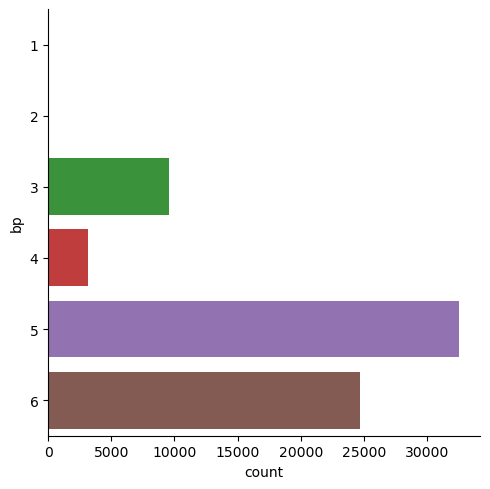

In [195]:
# Visualise the new "bp" category
print(CardioData_backup["bp"].value_counts())
sb.catplot(y = "bp", data = CardioData_backup, kind = "count")

# Categorical Analysis

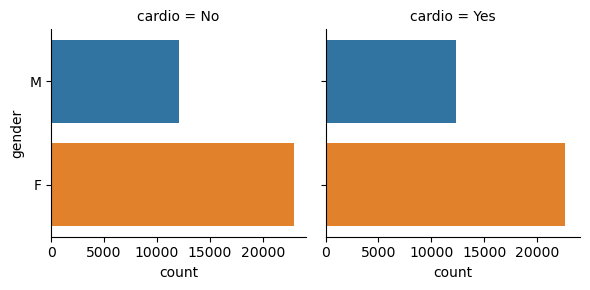

In [196]:
# Primary Type over Generations
sb.catplot(y = 'gender', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

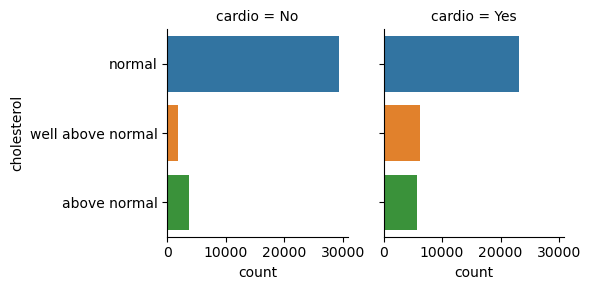

In [197]:
# Primary Type over Generations
sb.catplot(y = 'cholesterol', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

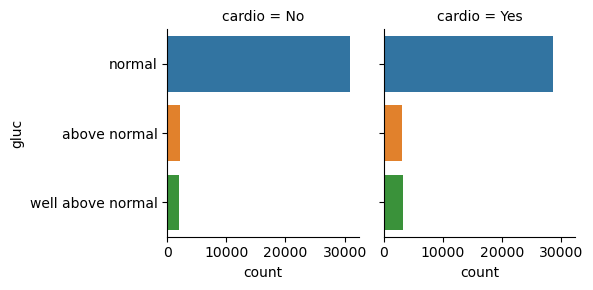

In [198]:
# Primary Type over Generations
sb.catplot(y = 'gluc', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

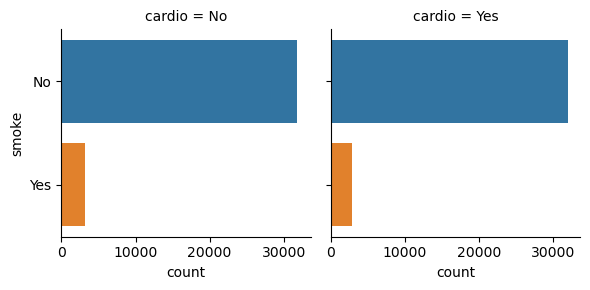

In [199]:
# Primary Type over Generations
sb.catplot(y = 'smoke', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

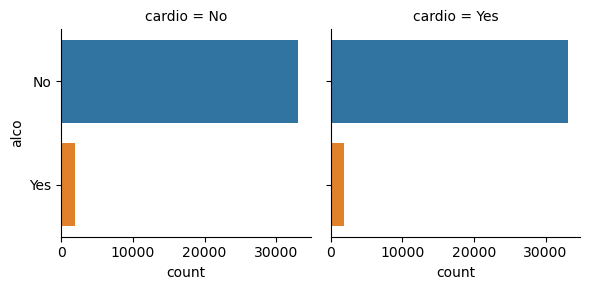

In [200]:
# Primary Type over Generations
sb.catplot(y = 'alco', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

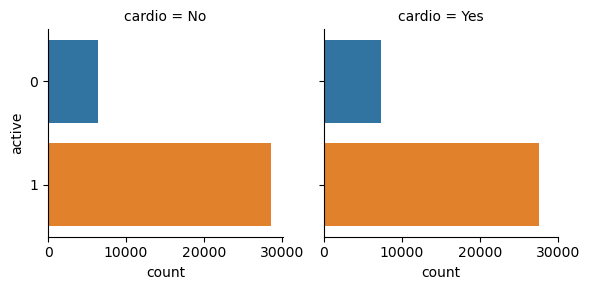

In [201]:
# Primary Type over Generations
sb.catplot(y = 'active', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 3)

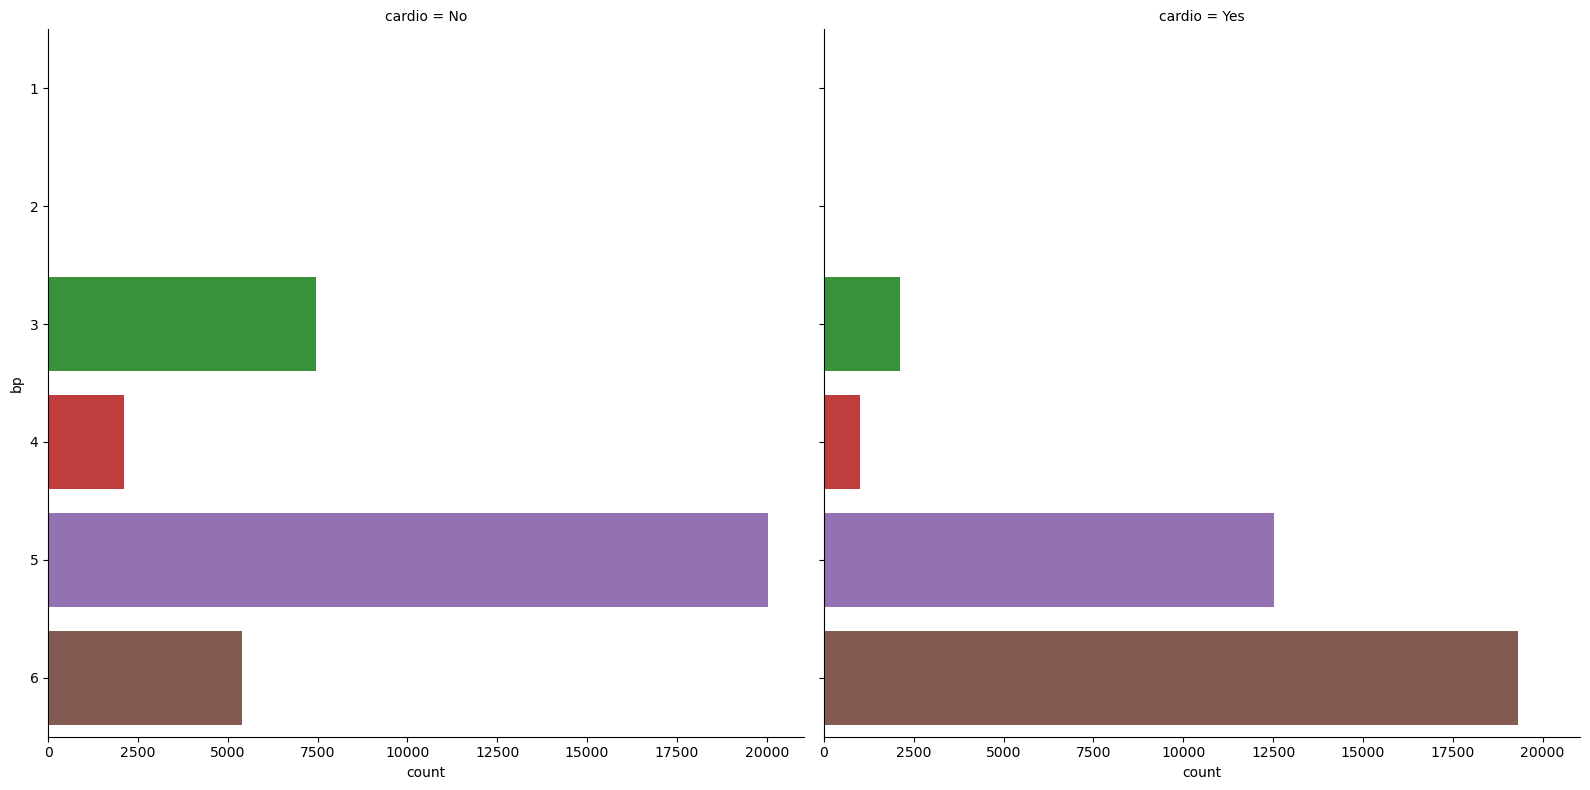

In [202]:
# Primary Type over Generations
sb.catplot(y = 'bp', data = CardioData_backup, col = 'cardio', kind = 'count', col_wrap = 2, height = 8)

**Heat maps for catagorical data**

In [203]:
'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio'

('gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio')

<AxesSubplot:xlabel='gender', ylabel='cardio'>

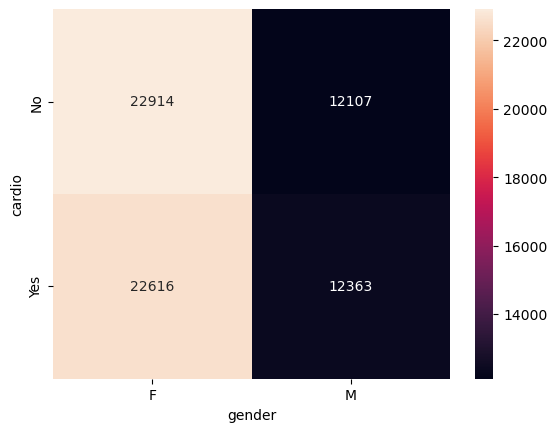

In [204]:
cardiotogender = CardioData_backup.groupby(['cardio','gender']).size()
cardiotogender = cardiotogender.reset_index(name = 'count')
cardiotogender = cardiotogender.pivot(index = 'cardio', columns = 'gender', values = 'count')
sb.heatmap(cardiotogender, annot = True, fmt = 'd')

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

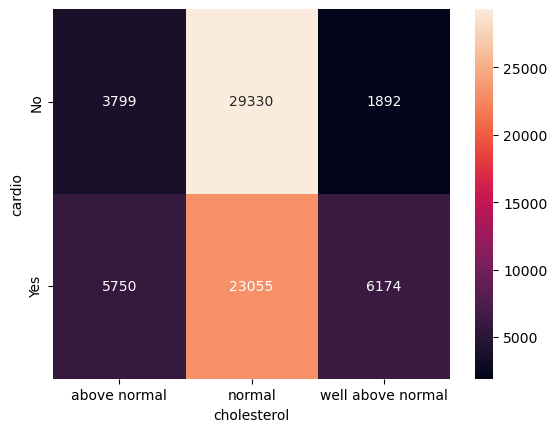

In [205]:
cardiotocholesterol = CardioData_backup.groupby(['cardio','cholesterol']).size()
cardiotocholesterol = cardiotocholesterol.reset_index(name = 'count')
cardiotocholesterol = cardiotocholesterol.pivot(index = 'cardio', columns = 'cholesterol', values = 'count')
sb.heatmap(cardiotocholesterol, annot = True, fmt = 'd')

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

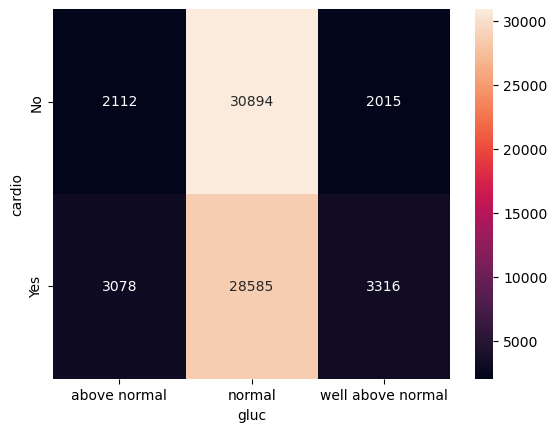

In [206]:
cardiotogluc = CardioData_backup.groupby(['cardio','gluc']).size()
cardiotogluc = cardiotogluc.reset_index(name = 'count')
cardiotogluc = cardiotogluc.pivot(index = 'cardio', columns = 'gluc', values = 'count')
sb.heatmap(cardiotogluc, annot = True, fmt = 'd')

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

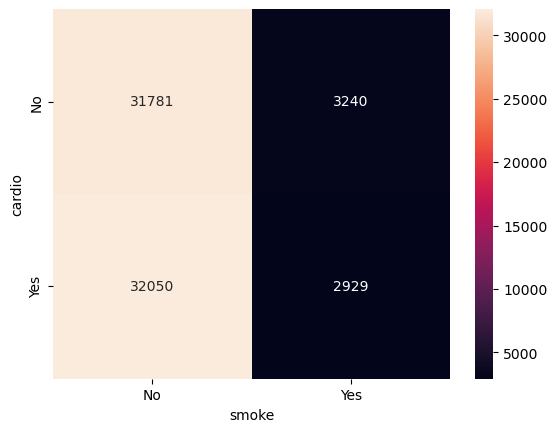

In [207]:
cardiotosmoke = CardioData_backup.groupby(['cardio','smoke']).size()
cardiotosmoke = cardiotosmoke.reset_index(name = 'count')
cardiotosmoke = cardiotosmoke.pivot(index = 'cardio', columns = 'smoke', values = 'count')
sb.heatmap(cardiotosmoke, annot = True, fmt = 'd')

<AxesSubplot:xlabel='alco', ylabel='cardio'>

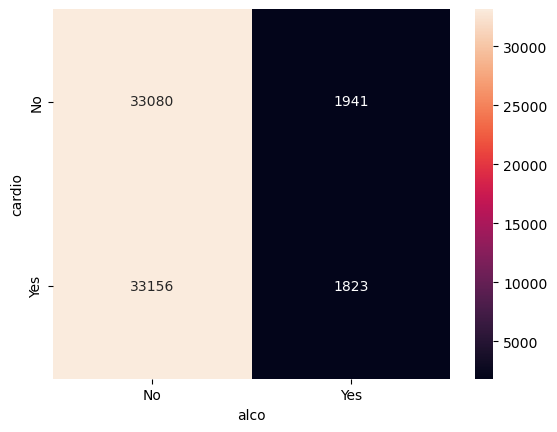

In [208]:
cardiotoalco = CardioData_backup.groupby(['cardio','alco']).size()
cardiotoalco = cardiotoalco.reset_index(name = 'count')
cardiotoalco = cardiotoalco.pivot(index = 'cardio', columns = 'alco', values = 'count')
sb.heatmap(cardiotoalco, annot = True, fmt = 'd')

<AxesSubplot:xlabel='active', ylabel='cardio'>

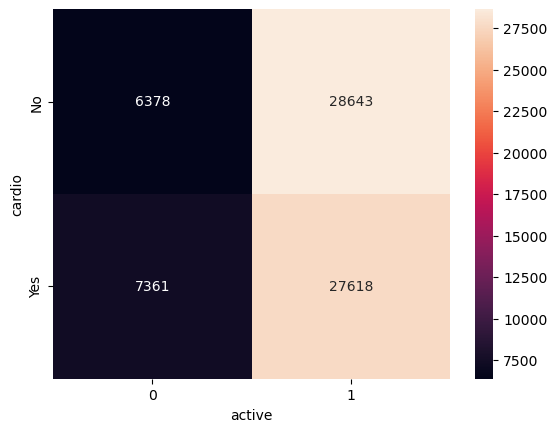

In [209]:
cardiotoactive = CardioData_backup.groupby(['cardio','active']).size()
cardiotoactive = cardiotoactive.reset_index(name = 'count')
cardiotoactive = cardiotoactive.pivot(index = 'cardio', columns = 'active', values = 'count')
sb.heatmap(cardiotoactive, annot = True, fmt = 'd')

<AxesSubplot:xlabel='bp', ylabel='cardio'>

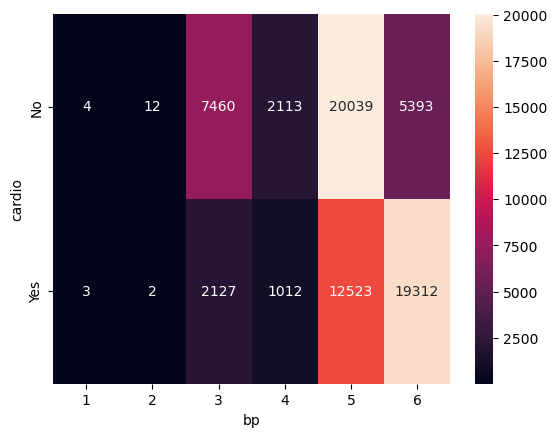

In [210]:
cardiotobp = CardioData_backup.groupby(['cardio','bp']).size()
cardiotobp = cardiotobp.reset_index(name = 'count')
cardiotobp = cardiotobp.pivot(index = 'cardio', columns = 'bp', values = 'count')
sb.heatmap(cardiotobp, annot = True, fmt = 'd')